In [1]:
import tensorflow as tf
from  tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'sneaker', 'Rag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_images)

10000

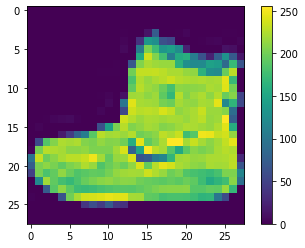

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0


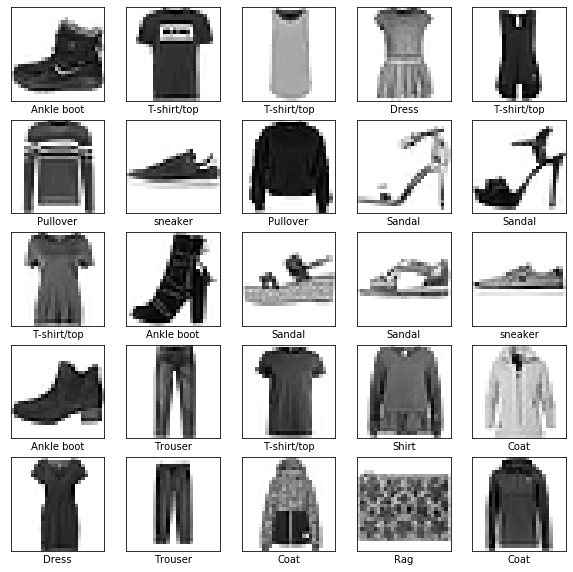

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.4987 - accuracy: 0.8254
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3753 - accuracy: 0.8653
Epoch 3/5
60000/60000 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.87 - 7s 114us/sample - loss: 0.3365 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3143 - accuracy: 0.8843
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2937 - accuracy: 0.8915


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy :", test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy : 0.872


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([9.3684775e-07, 5.1974625e-09, 1.5809110e-07, 5.1379516e-08,
       1.5415141e-07, 9.1470834e-03, 1.3311191e-06, 4.7468111e-02,
       1.6555922e-04, 9.4321656e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i],true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

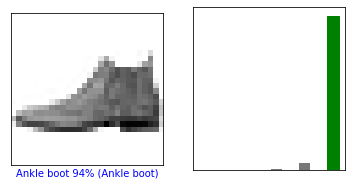

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

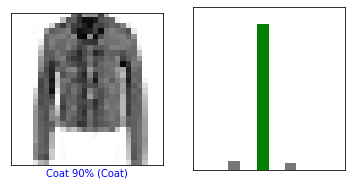

In [26]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

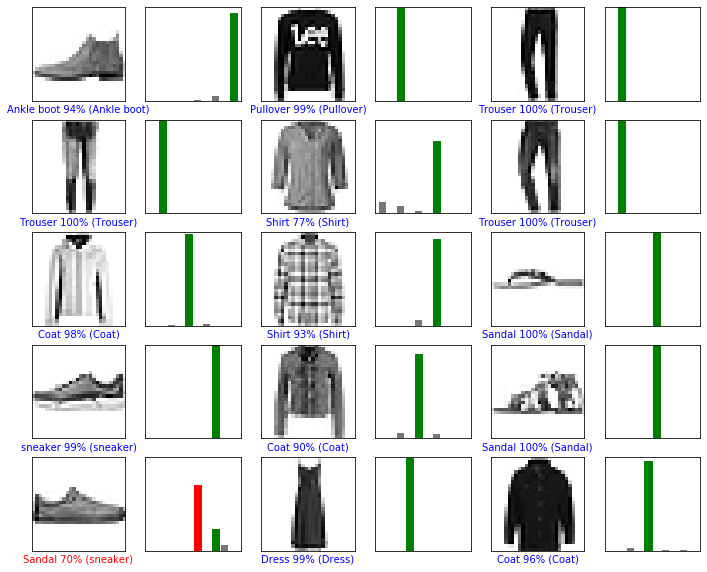

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [28]:
img = test_images[0]
print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.3684861e-07 5.1974727e-09 1.5809110e-07 5.1379715e-08 1.5415141e-07
  9.1470871e-03 1.3311191e-06 4.7468130e-02 1.6555922e-04 9.4321656e-01]]


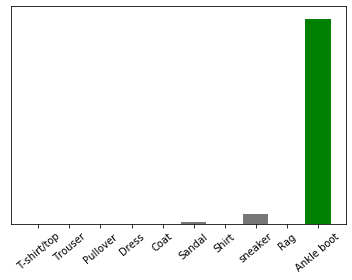

In [32]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=40)

In [33]:
np.argmax(predictions_single[0])

9